In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
df = pd.read_csv('C:\\Users\\Sambhu\\Desktop\\Imarticus\\Class Material\\kaggle\\flight_price.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
del df['Unnamed: 0']

In [7]:
del df['flight']

In [8]:
categorical = ['airline','source_city','departure_time','arrival_time','destination_city','class']

In [9]:
for column in categorical:
    print(column)
    print(df[column].value_counts())

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64
destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64
class
Economy     206666
Business     93487
Name: class, dtype: int64


In [10]:
# will consider stops as continuous

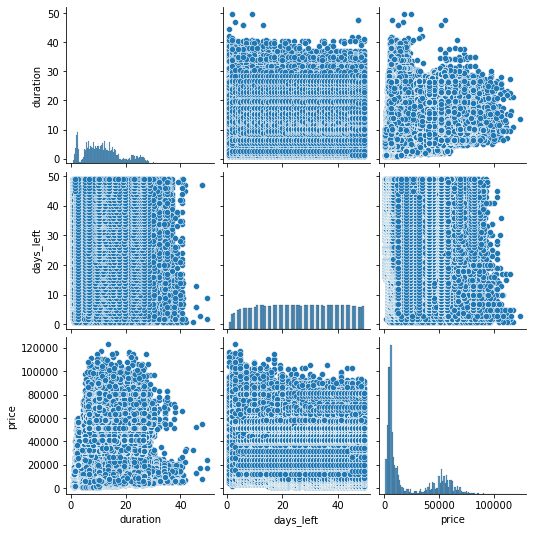

In [11]:
sns.pairplot(df)

In [12]:
df.stops.replace(['zero','one','two_or_more'],[0,1,2], inplace = True)

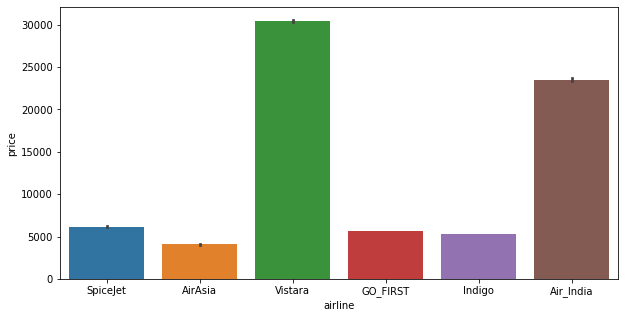

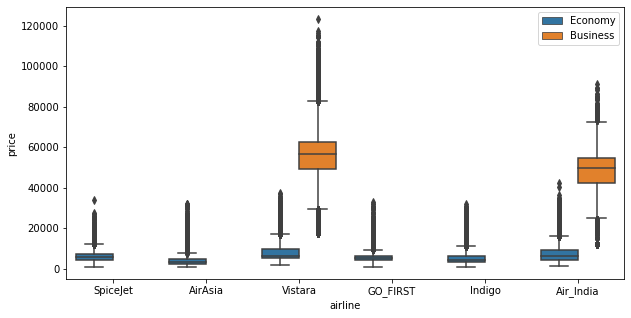

p-value 0.0
Good Predictor


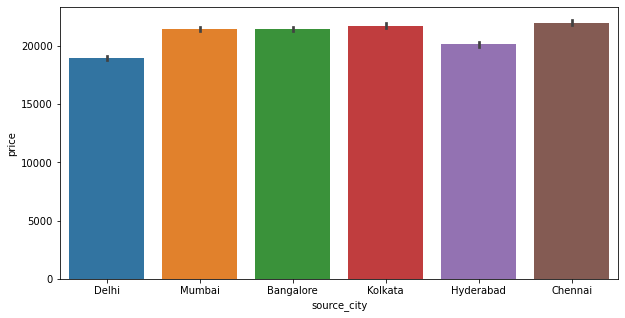

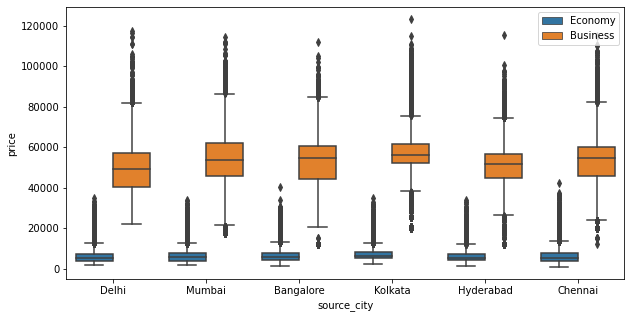

p-value 2.5500990712920574e-154
Good Predictor


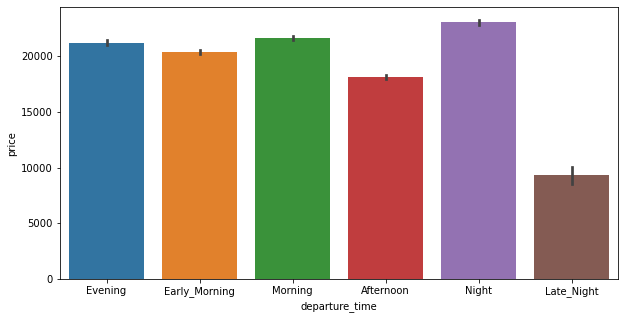

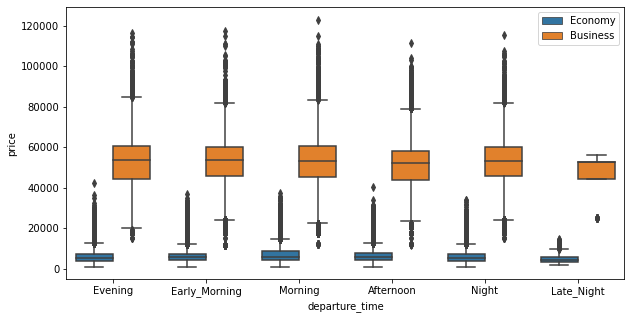

p-value 0.0
Good Predictor


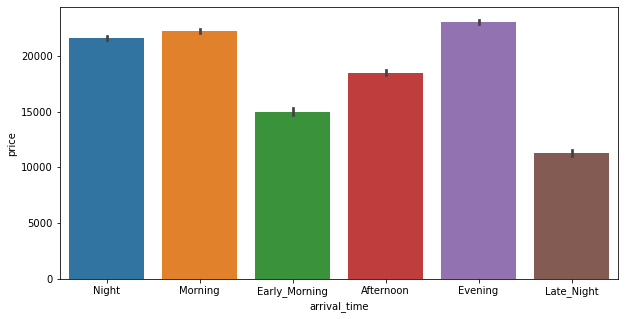

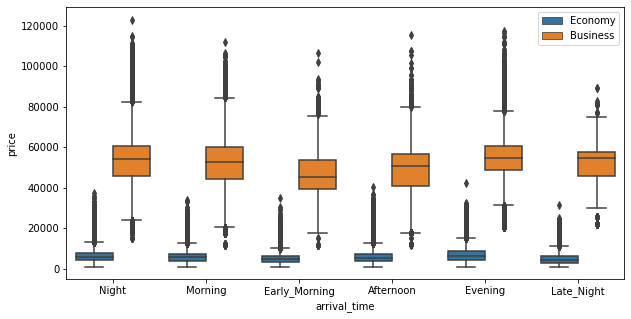

p-value 0.0
Good Predictor


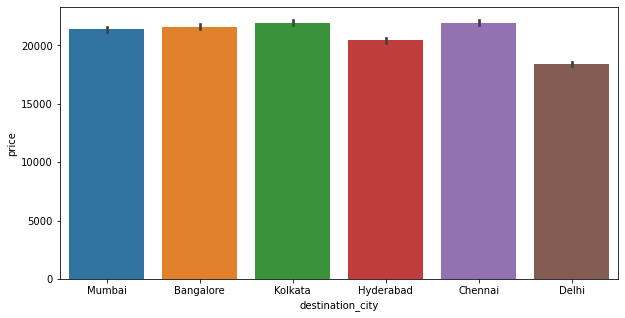

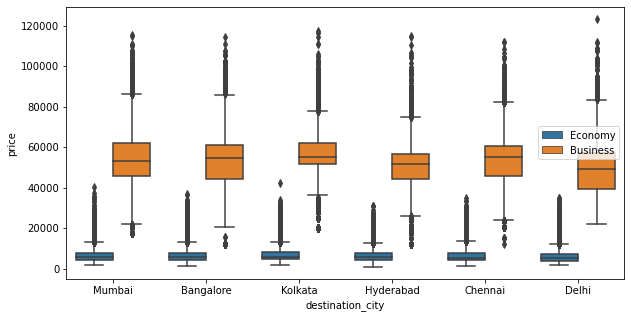

p-value 4.245267323767628e-206
Good Predictor


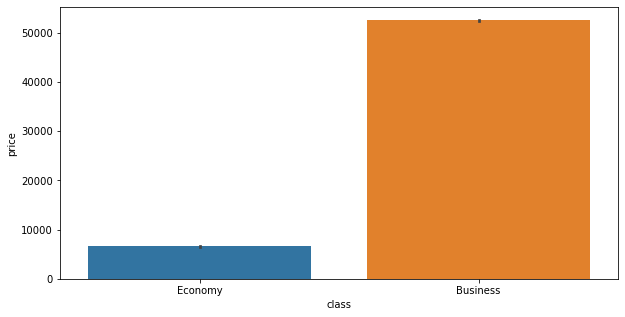

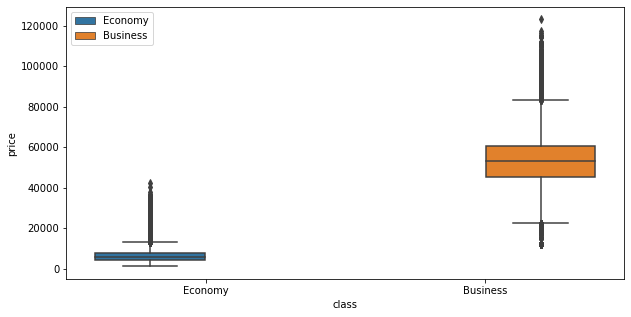

p-value 0.0
Good Predictor


In [13]:
for column in categorical:
    plt.figure(figsize = (10,5))
    sns.barplot(x = df[column], y= df['price'])
    plt.show()
    plt.figure(figsize = (10,5))
    sns.boxplot(x =df[column], y=df['price'], hue=df['class'])
    plt.legend(loc = 'best')
    plt.show()
    model = ols('price~df[column]', data = df).fit()
    aov_table = sm.stats.anova_lm(model)
    #print(aov_table)
    p = aov_table['PR(>F)'][0]
    print("p-value", p)
    if p>0.05:
        print("Bad Predictor")
    else:
        print("Good Predictor")

airline
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1    group2    meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------------
  AirAsia Air_India  19415.9464    0.0  18923.7733  19908.1195   True
  AirAsia  GO_FIRST   1560.9349    0.0    975.8053   2146.0644   True
  AirAsia    Indigo   1233.1436    0.0    706.4055   1759.8816   True
  AirAsia  SpiceJet   2088.2061    0.0   1337.9054   2838.5069   True
  AirAsia   Vistara  26305.4636    0.0    25828.53  26782.3972   True
Air_India  GO_FIRST -17855.0115    0.0  -18279.926  -17430.097   True
Air_India    Indigo -18182.8028    0.0  -18522.845 -17842.7606   True
Air_India  SpiceJet -17327.7402    0.0 -17961.0861 -16694.3944   True
Air_India   Vistara   6889.5172    0.0   6633.3114    7145.723   True
 GO_FIRST    Indigo   -327.7913 0.3359   -792.3028    136.7202  False
 GO_FIRST  SpiceJet    527.2713 0.2756   -180.7324    1235.275  False
 GO_FIRST   

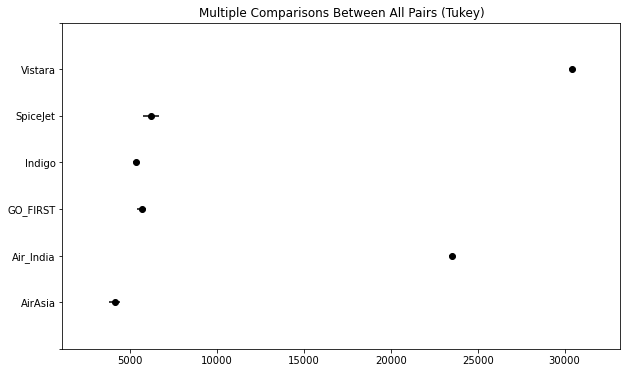

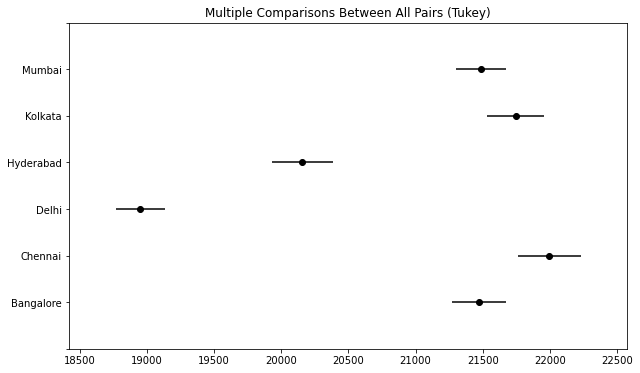

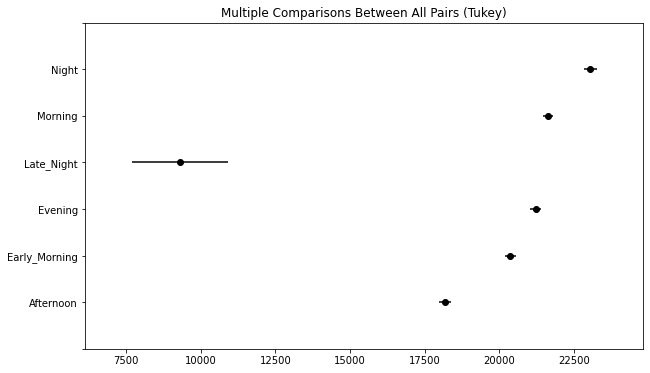

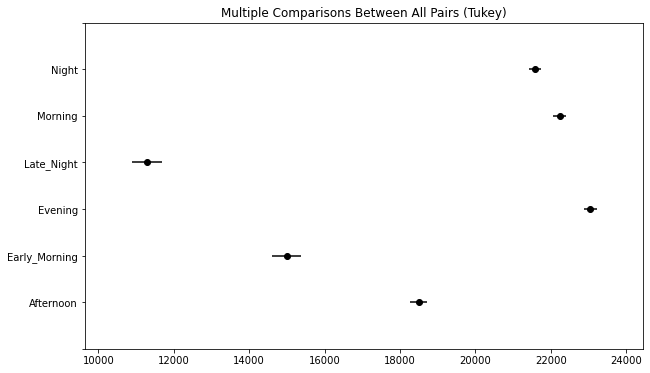

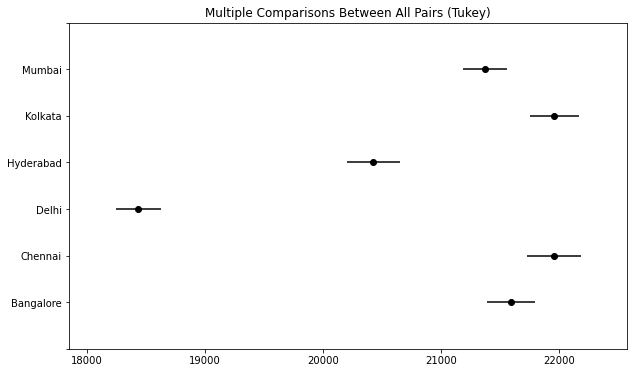

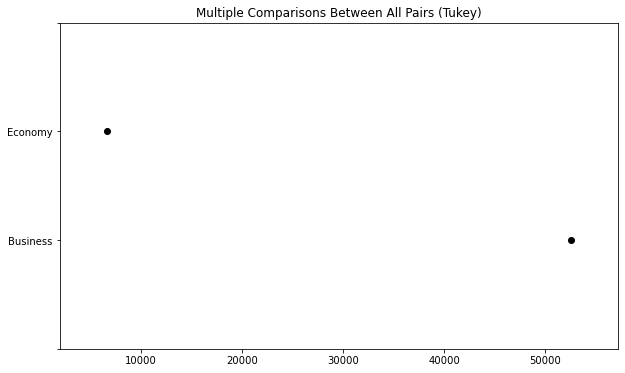

In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
for column in categorical:
    print(column)
    tukey= pairwise_tukeyhsd(df['price'],df[column], alpha=0.05)
    print(tukey)
    tukey.plot_simultaneous()

In [15]:
# Indigo, Go First to be grouped together

In [16]:
# Chennai and Kolkata can be grouped together, Bangalore and Mumbai can be grouped together in Source City and Destination City

In [17]:
df.airline.replace('GO_FIRST', 'Indigo', inplace= True)

In [18]:
df.source_city.replace(['Chennai','Bangalore'],['Kolkata','Mumbai'], inplace = True)

In [19]:
df.destination_city.replace(['Chennai','Bangalore'],['Kolkata','Mumbai'], inplace = True)

In [20]:
for column in categorical:
    print(column)
    print(df[column].value_counts())

airline
Vistara      127859
Air_India     80892
Indigo        66293
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64
source_city
Mumbai       112957
Kolkata       85047
Delhi         61343
Hyderabad     40806
Name: source_city, dtype: int64
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64
destination_city
Mumbai       110165
Kolkata       89902
Delhi         57360
Hyderabad     42726
Name: destination_city, dtype: int64
class
Economy     206666
Business     93487
Name: class, dtype: int64


In [21]:
continuous = ['duration','days_left', 'stops']

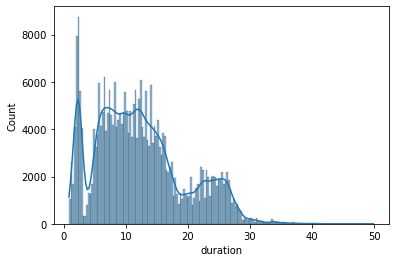

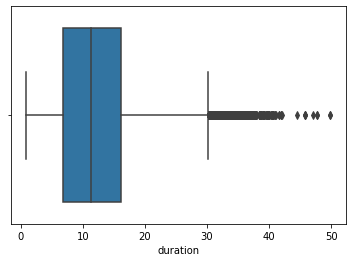

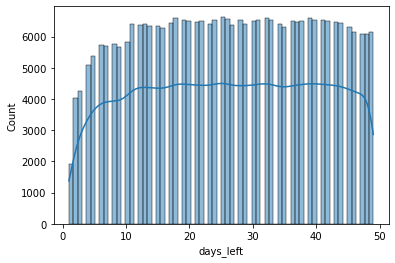

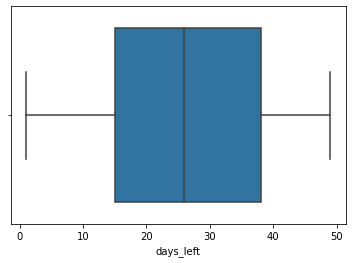

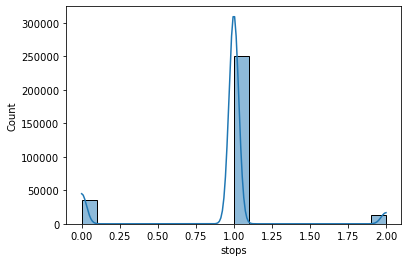

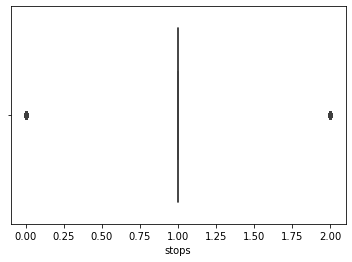

In [22]:
for column in continuous:
    plt.figure()
    sns.histplot(x = df[column], kde=True)
    plt.show()
    sns.boxplot(x = df[column], orient = 'h')

duration:


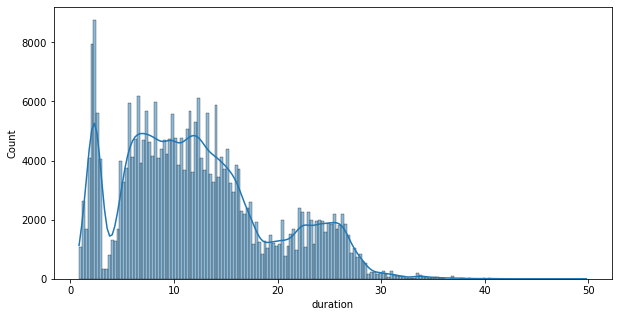

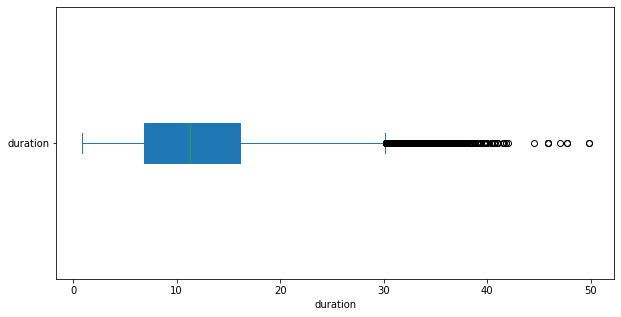

if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'no


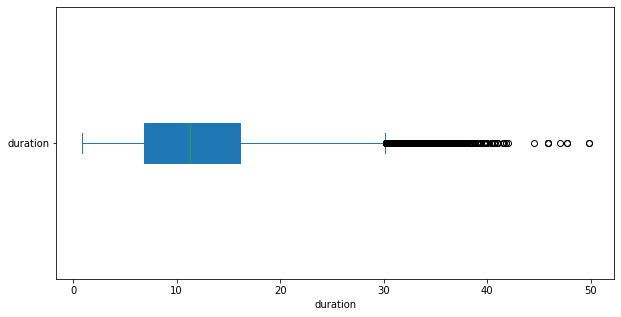

days_left:


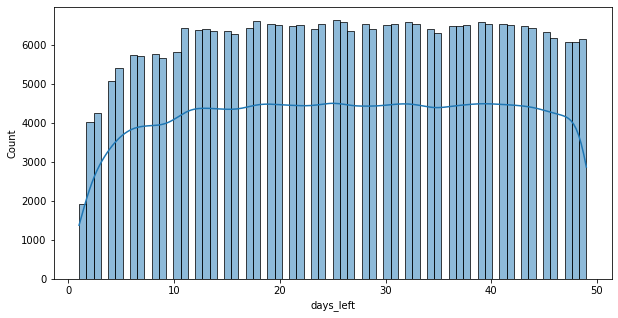

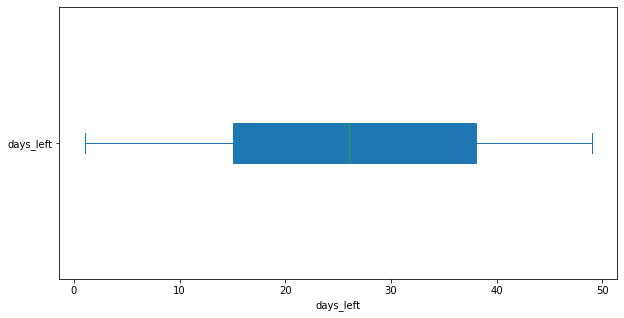

if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'no


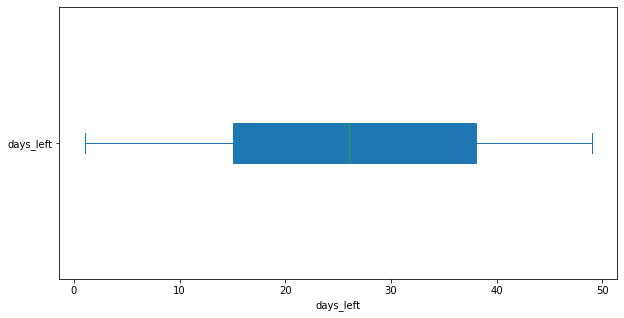

stops:


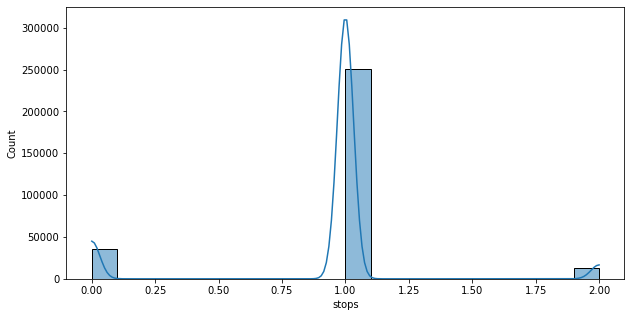

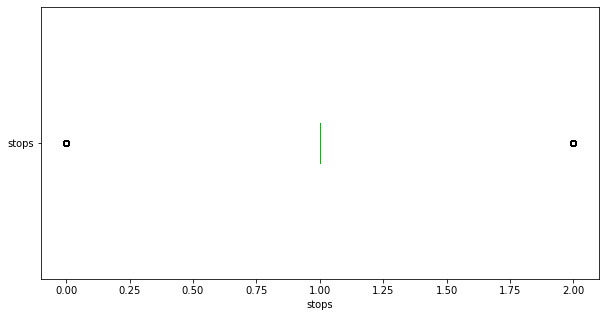

if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'no


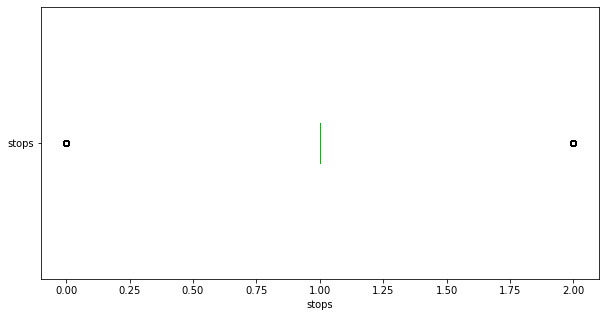

In [23]:
for i in continuous:
    print(i+":")
    plt.figure(figsize=(10,5))
    sns.histplot(x = df[i], kde=True)
    plt.xlabel(i)
    plt.show()
    plt.figure(figsize=(10,5))
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()
    
    iqr= df[i].quantile(0.75)-df[i].quantile(0.25)
    right_lim=df[i].quantile(0.75)+1.5*iqr
    leftt_lim=df[i].quantile(0.25)-1.5*iqr
    
    a=input("if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'")
    a=a.lower()
    if a=='left':
        lo=int(input('by what number do you want to replace'))
        df[i]=[lo if val<leftt_lim else val for val in df[i]]
    elif a=='right':
        ro=int(input('by what number do you want to replace'))
        df[i]=[ro if val>right_lim else val for val in df[i]]
    elif a=='both':
        lo=int(input('by what number do you want to replace'))
        ro=int(input('by what number do you want to replace'))
        df[i]=[ro if val>right_lim else val for val in df[i]]
        df[i]=[lo if val<leftt_lim else val for val in df[i]]
    elif a=='no':
        pass
    plt.figure(figsize=(10,5))
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

<AxesSubplot:>

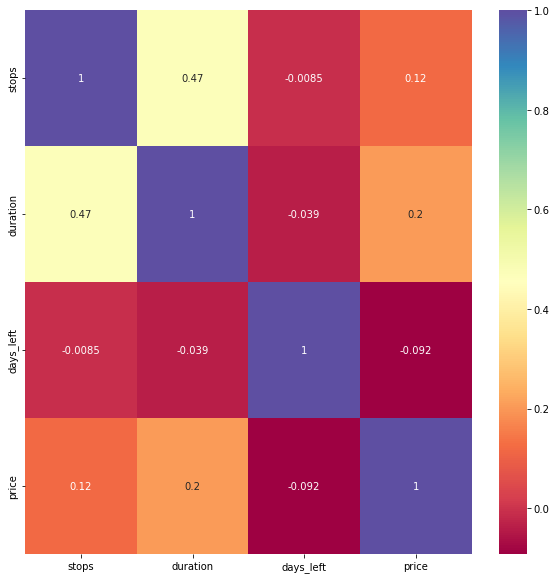

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')

In [25]:
# Correlation is very poor

In [26]:
df_airline = pd.get_dummies(df.airline, drop_first=True, prefix='airline')

In [27]:
df = pd.concat([df,df_airline], axis = 1)

In [28]:
del df['airline']

In [29]:
df_source = pd.get_dummies(df.source_city, drop_first=True, prefix='source')

In [30]:
df = pd.concat([df,df_source], axis = 1)

In [31]:
del df['source_city']

In [32]:
df_destination = pd.get_dummies(df.destination_city, drop_first=True, prefix='destination')

In [33]:
df = pd.concat([df,df_destination], axis = 1)

In [34]:
del df['destination_city']

In [35]:
df_arrival = pd.get_dummies(df.arrival_time, drop_first=True, prefix='arrival')

In [36]:
df = pd.concat([df,df_arrival], axis = 1)

In [37]:
del df['arrival_time']

In [38]:
df_departure = pd.get_dummies(df.departure_time, drop_first=True, prefix='departure')

In [39]:
df = pd.concat([df,df_departure], axis = 1)

In [40]:
del df['departure_time']

In [42]:
df['class'] = df['class'].replace(['Economy','Business'],[1,2])

In [43]:
df.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_Indigo,airline_SpiceJet,airline_Vistara,source_Hyderabad,...,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,1,2.17,1,5953,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,1,2.33,1,5953,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,1,2.17,1,5956,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,1,2.25,1,5955,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.33,1,5955,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   stops                    300153 non-null  int64  
 1   class                    300153 non-null  int64  
 2   duration                 300153 non-null  float64
 3   days_left                300153 non-null  int64  
 4   price                    300153 non-null  int64  
 5   airline_Air_India        300153 non-null  uint8  
 6   airline_Indigo           300153 non-null  uint8  
 7   airline_SpiceJet         300153 non-null  uint8  
 8   airline_Vistara          300153 non-null  uint8  
 9   source_Hyderabad         300153 non-null  uint8  
 10  source_Kolkata           300153 non-null  uint8  
 11  source_Mumbai            300153 non-null  uint8  
 12  destination_Hyderabad    300153 non-null  uint8  
 13  destination_Kolkata      300153 non-null  uint8  
 14  dest

# VIF

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
x = df[['stops', 'duration', 'days_left']]

In [47]:
vif_data = pd.DataFrame()

In [48]:
vif_data['features'] = x.columns

In [49]:
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [50]:
vif_data

,features,VIF
0,stops,5.967857
1,duration,4.710073
2,days_left,2.997645


In [51]:
x = df.iloc[:, df.columns != 'price']

In [52]:
y = df.iloc[:, df.columns == 'price']

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=123)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [55]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [56]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(random_state= 123)

In [57]:
y_train.squeeze()

111393     3006
291129    61985
68223      5817
89352      2723
104243     5410
          ...  
192476     1830
17730      7685
28030      6578
277869    45883
249342    54684
Name: price, Length: 210107, dtype: int64

In [58]:
model = sgdr.fit(x_train,y_train.squeeze())

In [59]:
y_pred_tr = model.predict(x_train)

In [60]:
y_pred_te = model.predict(x_test)

In [61]:
model.score(x_train,y_train)

0.9094465145026419

In [62]:
model.score(x_test,y_test)

0.9088085566252362

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
mean_squared_error(y_test,y_pred_te)

46821430.75574322

In [65]:
model.intercept_

array([20913.35450755])

In [66]:
model.coef_

array([ 2.23282940e+03,  2.09627240e+04,  6.35683006e+02, -1.72174664e+03,
       -1.93338986e+01,  9.65963526e+02,  4.16115270e+02,  1.94760923e+03,
        2.09023998e+01,  9.45028110e+02,  7.02473083e+02, -1.06162709e+02,
        9.77703767e+02,  7.47042428e+02, -2.21685612e+02,  3.40498093e+02,
        2.25321458e+02,  1.42651101e+02,  4.07598768e+02,  3.59282847e+02,
        1.89036955e+02,  9.78950611e+01,  3.60233083e+02,  2.41454651e+02])

In [67]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   stops                    300153 non-null  int64  
 1   class                    300153 non-null  int64  
 2   duration                 300153 non-null  float64
 3   days_left                300153 non-null  int64  
 4   airline_Air_India        300153 non-null  uint8  
 5   airline_Indigo           300153 non-null  uint8  
 6   airline_SpiceJet         300153 non-null  uint8  
 7   airline_Vistara          300153 non-null  uint8  
 8   source_Hyderabad         300153 non-null  uint8  
 9   source_Kolkata           300153 non-null  uint8  
 10  source_Mumbai            300153 non-null  uint8  
 11  destination_Hyderabad    300153 non-null  uint8  
 12  destination_Kolkata      300153 non-null  uint8  
 13  destination_Mumbai       300153 non-null  uint8  
 14  arri

In [68]:
from sklearn.preprocessing import PowerTransformer

In [69]:
pt= PowerTransformer(method='yeo-johnson')

In [71]:
x_train = pt.fit_transform(x_train)
x_test = pt.transform(x_test)

In [72]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(random_state= 123)

In [73]:
model = sgdr.fit(x_train,y_train.squeeze())

In [74]:
y_pred_tr = model.predict(x_train)

In [75]:
y_pred_te = model.predict(x_test)

In [76]:
model.score(x_train,y_train)

0.908719727833667

In [77]:
model.score(x_test,y_test)

0.9080838550545453

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
mean_squared_error(y_test,y_pred_te)

47193522.29366567